In [9]:
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Noto' in font.name or 'Malgun' in font.name or 'Apple' in font.name:
        print(font.name)

Malgun Gothic
Malgun Gothic
Noto Sans KR
Malgun Gothic


In [10]:
import matplotlib.pyplot as plt

In [11]:
import platform

#폰트지정``
if platform.system() == 'Noto Sans KR':
    plt.rc('font', family='Malgun Gothic')

In [12]:
plt.rc('font', family = 'Noto Sans KR')

In [13]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

1. 데이터 구조 파악
2. 결측치 확인
3. 이상치/오류 데이터 탐색
4. 데이터 타입 확인 및 변환 
5. 중복데이터 확인 및 제거
6. 기본 통계치 확인
7. 컬럼별 값의 분포 확인
8. 데이터이 목적에 맞는 정제/필터링 

컬럼별 설명
customerID: 고객 식별번호 (고유값)

gender: 성별 (Male/남, Female/여)

SeniorCitizen: 시니어(고령) 고객 여부 (0: 일반, 1: 시니어)

Partner: 배우자 유무 (Yes/No)

Dependents: 부양가족 유무 (Yes/No)

tenure: 서비스 이용 개월 수 (가입 기간)

PhoneService: 전화 서비스 가입 여부 (Yes/No)

MultipleLines: 여러 회선(전화) 사용 여부 (Yes/No/No phone service)

InternetService: 인터넷 서비스 종류 (DSL, Fiber optic, No)

OnlineSecurity: 온라인 보안 서비스 가입 여부 (Yes/No/No internet service)

OnlineBackup: 온라인 백업 서비스 가입 여부 (Yes/No/No internet service)

DeviceProtection: 디바이스 보호 서비스 가입 여부 (Yes/No/No internet service)

TechSupport: 기술지원 서비스 가입 여부 (Yes/No/No internet service)

StreamingTV: TV 스트리밍 서비스 이용 여부 (Yes/No/No internet service)

StreamingMovies: 영화 스트리밍 서비스 이용 여부 (Yes/No/No internet service)

Contract: 계약 형태 (Month-to-month: 월 단위, One year: 1년 계약, Two year: 2년 계약)

PaperlessBilling: 전자 청구서 이용 여부 (Yes/No)

PaymentMethod: 결제 방법 (Bank transfer, Credit card, 전자수표 등)

MonthlyCharges: 월 청구 금액

TotalCharges: 총 청구 금액

Churn: 이탈 여부 (Yes: 서비스 해지, No: 계속 이용)

In [14]:
df.info()
# null 값 없음
# 수치형 데이터 늙은 사람(0-일반, 1노인)/ 서비스 이용개월 수 / 월요금
# 행 7043 열 21개 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [16]:
df[c'number']

SyntaxError: invalid syntax (2386636271.py, line 1)

In [ ]:
# null 값 없음
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())
print(df['SeniorCitizen'].value_counts())
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')\
    
df_sub = df[['SeniorCitizen','tenure']].dropna()

In [ ]:
df_sub

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


In [ ]:
corr = df_sub.corr()
corr


,SeniorCitizen,tenure
SeniorCitizen,1.000000,0.016567
tenure,0.016567,1.000000


In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
import matplotlib.pyplot as plt

group_tenure = df.groupby('SeniorCitizen')['tenure'].mean()
group_Churn = df.groupby('SeniorCitizen')['Churn'].value_counts()
print(group_Churn)


SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64


In [ ]:
# SeniorCitizen별 전체 고객수, 이탈 고객 수 집계
total = df.groupby('SeniorCitizen').size() # 전체 이탈 고객수 집계 
churned = df[df['Churn'] == 'Yes'].groupby('SeniorCitizen').size() # 이탈 고객수 
churn_rate = (churned / total)* 100

print(churn_rate)

SeniorCitizen
0    23.606168
1    41.681261
dtype: float64


In [ ]:
group_Churn[0]

Churn
No     4508
Yes    1393
Name: count, dtype: int64

In [ ]:
group_tenure = df.groupby('SeniorCitizen')['tenure']
group0 = df[df['SeniorCitizen'] == 0]['tenure']
group1 = df[df['SeniorCitizen'] == 1]['tenure']



(array([180.,  84.,  45.,  57.,  45.,  49.,  38.,  56.,  45.,  47.,  39.,
         31.,  46.,  31.,  46.,  45.,  41.,  30.,  70., 117.]),
 array([ 1.  ,  4.55,  8.1 , 11.65, 15.2 , 18.75, 22.3 , 25.85, 29.4 ,
        32.95, 36.5 , 40.05, 43.6 , 47.15, 50.7 , 54.25, 57.8 , 61.35,
        64.9 , 68.45, 72.  ]),
 <BarContainer object of 20 artists>)

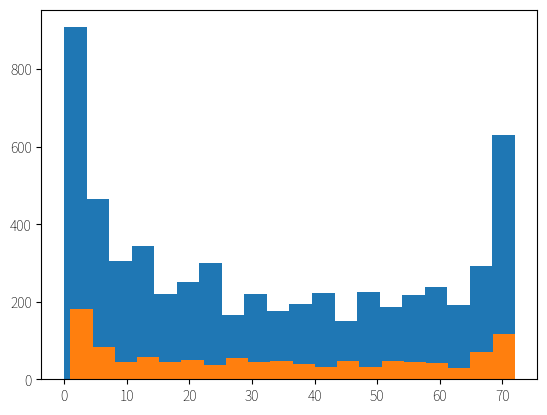

In [ ]:
plt.Figure


plt.hist(group0, bins=20)
plt.hist(group1, bins=20)

# 결론 1 

평균 5개월 이내 대부분의 고객이 이탈한다

to - do 
1. 이탈 원인을 찾아서 5개월 이상 사용한 고객들과 어떤 차이점이 있는지 분석하고 이탈률을 줄여야 함 
2. 60개월 이상인 고객을 찾아서 70 개월 이상 사용한 고객과 비교하여 어떤 차별점이 있는지 찾고 유도해야 함 


5개월 이내인 사람들 

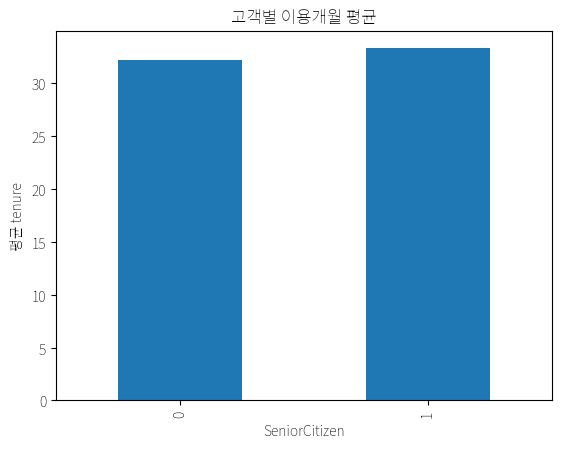

In [ ]:
group.plot(kind='bar')
plt.xlabel('SeniorCitizen')
plt.ylabel('평균 tenure')
plt.title('고객별 이용개월 평균')
plt.show()

# 결론2

일반 고객이나 나이가 많은 고객이나 평균이용 개월 수는 비슷하다

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
import matplotlib.pyplot as plt

group = df.groupby('Churn')
group

In [ ]:
# 결과를 딕셔너리로 저장
cor_dict = {}   

for name, i in group:
    cor_matrix = df[num_cols].corr()
    cor_dict[name] = cor_matrix
    print(f'===Churn: {name}')
    print(cor_matrix)
    print('\n')

===Churn: No
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


===Churn: Yes
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000




In [17]:
# 결과를 딕셔너리로 저장
cor_dict = {}   

for name in df:
    cor_matrix = df.corr()
    cor_dict[name] = cor_matrix
    print(f'===Churn: {name}')
    print(cor_matrix)
    print('\n')

ValueError: could not convert string to float: '7590-VHVEG'

In [19]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [29]:
df1 = df['Churn'].map({'No':0,'Yes':1 })

In [34]:
df1 = df.copy()

In [35]:
df1['Churn'] = df1['Churn'].map({'No':0,'Yes':1 })

In [39]:
num = df1.select_dtypes(include=['int64', 'float64'])

In [40]:
num.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


In [25]:
num_cols.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


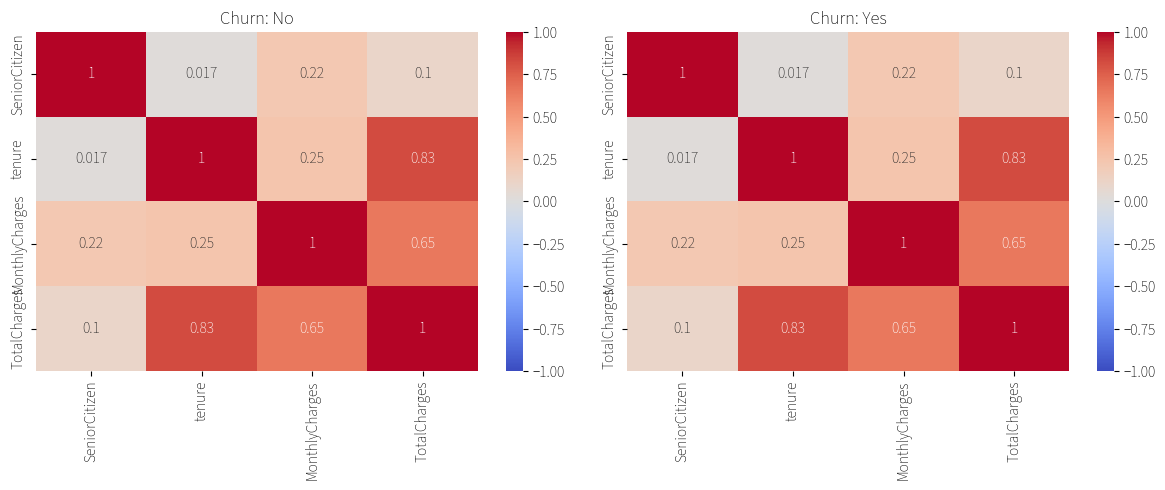

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 딕셔너리 cor_dict에 저장되어 있다고 가정

group_names = list(cor_dict.keys())
n_groups = len(group_names)

fig, axs = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5))  # 그룹 수에 따라 크기 조정

if n_groups == 1:
    axs = [axs]  # 그룹이 하나일 때도 인덱싱을 위해 리스트로 변환

for i, name in enumerate(group_names):
    sns.heatmap(
        cor_dict[name], 
        annot=True, 
        cmap='coolwarm', 
        vmin=-1, vmax=1, 
        ax=axs[i]
    )
    axs[i].set_title(f'Churn: {name}')

plt.tight_layout()
plt.show()
df.info()

# 결론3

상관계수는 비슷비슷함..